# 01 - Data Understanding

This notebook performs the first pass at understanding the datasets provided for the sales forecasting task.

## Objectives

- Explore structure and contents of each CSV file
- Check for nulls, data types, and basic stats
- Observe value distributions and time coverage
- Prepare notes for data cleaning and feature engineering

## Input

### Files

- `train.csv`: historical unit sales data
- `test.csv`: future data to predict
- `stores.csv`: store metadata
- `holidays_events.csv`: national/local events
- `oil.csv`: daily oil prices
- `transactions.csv`: daily store-level transaction counts

### Import Libraries and Configure Display Settings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')

## Load Data

In [3]:
data_path = '../data/raw/'

train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
stores = pd.read_csv(data_path + 'stores.csv')
holidays = pd.read_csv(data_path + 'holidays_events.csv')
oil = pd.read_csv(data_path + 'oil.csv')
transactions = pd.read_csv(data_path + 'transactions.csv')

## Sample Rows (First Glance at Features)

In [4]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


### Observation on test.csv

The presence of rows in test.csv with sales missing (but store_nbr, family, onpromotion, and date present) tells us directly: we must predict sales for every (store, family, date) combination.

In [6]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Dataset Shapes & Ranges

### Shapes

In [10]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('Stores shape:', stores.shape)
print('Holidays shape:', holidays.shape)
print('Oil shape:', oil.shape)
print('Transactions shape:', transactions.shape)

Train shape: (3000888, 6)
Test shape: (28512, 5)
Stores shape: (54, 5)
Holidays shape: (350, 6)
Oil shape: (1218, 2)
Transactions shape: (83488, 3)


### Ranges

In [11]:
# Use datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Print date ranges for each dataset
print("Train Date Range:      ", train['date'].min(), "to", train['date'].max())
print("Test Date Range:       ", test['date'].min(), "to", test['date'].max())
print("Oil Date Range:        ", oil['date'].min(), "to", oil['date'].max())
print("Holidays Date Range:   ", holidays['date'].min(), "to", holidays['date'].max())
print("Transactions Date Range:", transactions['date'].min(), "to", transactions['date'].max())

Train Date Range:       2013-01-01 00:00:00 to 2017-08-15 00:00:00
Test Date Range:        2017-08-16 00:00:00 to 2017-08-31 00:00:00
Oil Date Range:         2013-01-01 00:00:00 to 2017-08-31 00:00:00
Holidays Date Range:    2012-03-02 00:00:00 to 2017-12-26 00:00:00
Transactions Date Range: 2013-01-01 00:00:00 to 2017-08-15 00:00:00


### Observations on Dataset Shapes & Ranges:

- The **training dataset** (`train.csv`) contains over **3 million records** with 6 columns. This indicates a rich historical dataset, sufficient for training high-capacity models.
- The **test.csv** file having 28,512 rows for 16 days confirms that there are 1782 distinct (store_nbr, family) pairs.
- The **stores dataset** has **54 entries**, aligning with the known number of store branches.
- The **holidays dataset** contains **350 rows**, representing event or holiday dates across several years. Its compact size suggests it will be used as a supplementary feature.
- The **oil dataset** includes **1,218 rows**, indicating that oil price data is not fully aligned with the full range of sales data and may require imputation.
- The **transactions dataset** has **83,488 entries**, which suggests it covers fewer dates or stores than the main sales dataset and may have missing entries.

## Data Types

In [12]:
# Define datasets and labels
datasets = [train, test, stores, holidays, oil, transactions]
names = ['train', 'test', 'stores', 'holidays', 'oil', 'transactions']

# Loop through each and display info
for df, name in zip(datasets, names):
    print(f"\n{name.upper()} — info():")
    df.info()


TRAIN — info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB

TEST — info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usa

### Observations on Data Types

- **Datetime Columns**: All datasets with a `date` column have correctly parsed it as `datetime64[ns]`, which is well-suited for time series operations.

- **Store Identifiers**: The `store_nbr` column is consistently typed as `int64` across datasets, supporting future joins and grouped aggregations.

- **Categorical Fields**: 
  - Fields such as `family`, `city`, `state`, `type`, `locale`, and `locale_name` are currently stored as `object`. These may need to be converted to `category` or encoded numerically for machine learning models.

- **Sales and Numeric Columns**:
  - The `sales` column in `train.csv` is `float64`, suggesting the presence of fractional values (possibly due to returns or promotional adjustments).
  - `onpromotion`, `transactions`, and `cluster` are all integers, but may need to be evaluated for categorical treatment depending on modeling needs.

- **Boolean Field**: 
  - The `transferred` column in `holidays_events.csv` is a `bool`, providing clear binary information useful for modeling special day effects.


## Null value check

In [13]:
for df, name in zip([train, test, stores, holidays, oil, transactions],
                    ['train', 'test', 'stores', 'holidays', 'oil', 'transactions']):
    print(f"\nMissing values in {name}:")
    missing = df.isnull().sum()
    print(missing[missing > 0])


Missing values in train:
Series([], dtype: int64)

Missing values in test:
Series([], dtype: int64)

Missing values in stores:
Series([], dtype: int64)

Missing values in holidays:
Series([], dtype: int64)

Missing values in oil:
dcoilwtico    43
dtype: int64

Missing values in transactions:
Series([], dtype: int64)


### Observations on Null Value 

- `train.csv`: No missing values.
- `test.csv`: No missing values.
- `stores.csv`: No missing values.
- `holidays_events.csv`: No missing values.
- `oil.csv`: 43 missing values in the `dcoilwtico` (oil price) column. This will require cleaning or imputation.
- `transactions.csv`: No missing values.

No additional missing values were found during this check.


## Duplicate Check

In [14]:
# Duplicate Check
datasets = [train, test, stores, holidays, oil, transactions]
names = ['train', 'test', 'stores', 'holidays', 'oil', 'transactions']

for df, name in zip(datasets, names):
    # Total duplicate rows in the dataset
    dup_count = df.duplicated().sum()
    print(f"{name.capitalize()}: total duplicate rows = {dup_count}")
    if name == 'train':
        key = ['date', 'store_nbr', 'family']
    elif name == 'test':
        key = ['date', 'store_nbr', 'family']
    elif name == 'stores':
        key = ['store_nbr']
    elif name == 'oil':
        key = ['date']
    elif name == 'transactions':
        key = ['date', 'store_nbr']
    else:
        key = None
    if key:
        key_dup_count = df.duplicated(subset=key).sum()
        print(f"    Duplicate entries by key {key}: {key_dup_count}")


Train: total duplicate rows = 0
    Duplicate entries by key ['date', 'store_nbr', 'family']: 0
Test: total duplicate rows = 0
    Duplicate entries by key ['date', 'store_nbr', 'family']: 0
Stores: total duplicate rows = 0
    Duplicate entries by key ['store_nbr']: 0
Holidays: total duplicate rows = 0
Oil: total duplicate rows = 0
    Duplicate entries by key ['date']: 0
Transactions: total duplicate rows = 0
    Duplicate entries by key ['date', 'store_nbr']: 0


## Unique Values / Cardinality Check

In [15]:
# Check unique counts for each categorical columns
for df, name in zip(datasets, names):
    print(f"{name.capitalize()} unique values:")
    for col in df.columns:
        unique_count = df[col].nunique(dropna=False)
        print(f"  {col}: {unique_count}")
    print("-" * 40)

Train unique values:
  id: 3000888
  date: 1684
  store_nbr: 54
  family: 33
  sales: 379610
  onpromotion: 362
----------------------------------------
Test unique values:
  id: 28512
  date: 16
  store_nbr: 54
  family: 33
  onpromotion: 212
----------------------------------------
Stores unique values:
  store_nbr: 54
  city: 22
  state: 16
  type: 5
  cluster: 17
----------------------------------------
Holidays unique values:
  date: 312
  type: 6
  locale: 3
  locale_name: 24
  description: 103
  transferred: 2
----------------------------------------
Oil unique values:
  date: 1218
  dcoilwtico: 999
----------------------------------------
Transactions unique values:
  date: 1682
  store_nbr: 54
  transactions: 4993
----------------------------------------


### Observations on Unique Values / Cardinality

- **Train/Test Structure**:
  - The training set spans **1684 days**, while the test set covers only **16 days**, confirming it’s a short-term forecasting window.
  - There are **54 unique stores** and **33 product families**, resulting in **1,782 (store × family) combinations**, consistent across both train and test sets.
  - The number of unique `id`s matches the row count in both train and test sets, indicating each row is a unique observation.

- **Sales and Promotions**:
  - The `sales` column has ~380,000 unique values, suggesting a wide range and possibly a continuous distribution (not limited to small integers).
  - The `onpromotion` field has 362 unique values in train and 212 in test, implying a range of promotional intensities per store-family-date.

- **Stores Metadata**:
  - The store metadata shows diversity: **22 cities**, **16 states**, and **5 store types**, which can be valuable for modeling regional patterns.
  - The **cluster** field groups stores into **17 distinct clusters**, potentially useful for aggregation or segmentation in feature engineering.

- **Holidays Data**:
  - There are **312 unique holiday dates**, with a wide variety of **103 descriptions**. This suggests a rich event calendar to extract signals from.
  - Only **6 holiday types** and **3 locales** (likely: national, regional, local), which can be used to capture broad vs. local effects.
  - The `transferred` flag has just **2 unique values** (True/False), suitable for binary encoding.

- **Oil Prices**:
  - Oil price data covers **1,218 days**, which is less than the full train period—indicating missing dates.
  - Only **999 unique price values**, suggesting prices are reused or stable over short periods.

- **Transactions**:
  - The `transactions` file spans **1,682 days**, slightly less than the training period, and contains **4,993 unique transaction values**.
  - Each store has transaction data, reinforcing that customer traffic can be modeled per store per day.

These findings validate dataset completeness, reveal feature granularity, and help guide encoding strategies and data joining in the feature engineering phase.


## Consistency Across Datasets

In [16]:
# Check for consistent store identifiers across datasets
train_stores = set(train['store_nbr'])
test_stores = set(test['store_nbr'])
stores_master = set(stores['store_nbr'])
trans_stores = set(transactions['store_nbr'])

print("Stores in train not in stores list:", train_stores - stores_master)
print("Stores in stores list not in train:", stores_master - train_stores)
print("Stores in test not in train:", test_stores - train_stores)
print("Stores in test not in stores list:", test_stores - stores_master)
print("Stores in transactions not in train:", trans_stores - train_stores)
print("Stores in transactions not in stores list:", trans_stores - stores_master)

# Check for consistent product families between train and test
if 'family' in train.columns and 'family' in test.columns:
    train_families = set(train['family'])
    test_families = set(test['family'])
    print("Families in test not in train:", test_families - train_families)
    print("Families in train not in test:", train_families - test_families)

# Check date ranges for train and test
train_start, train_end = train['date'].min(), train['date'].max()
test_start, test_end = test['date'].min(), test['date'].max()
print("Train date range:", train_start.date(), "to", train_end.date())
print("Test date range:", test_start.date(), "to", test_end.date())
if test_start <= train_end:
    print("WARNING: Test start date is not after train end date!")
else:
    gap = (test_start - train_end).days - 1
    print(f"Gap between train end and test start: {gap} days")


Stores in train not in stores list: set()
Stores in stores list not in train: set()
Stores in test not in train: set()
Stores in test not in stores list: set()
Stores in transactions not in train: set()
Stores in transactions not in stores list: set()
Families in test not in train: set()
Families in train not in test: set()
Train date range: 2013-01-01 to 2017-08-15
Test date range: 2017-08-16 to 2017-08-31
Gap between train end and test start: 0 days


## Summary Statistics for Numerical Columns

In [17]:
train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


### Observations on Summary Statistics

- The `sales` column has a minimum of 0 and a maximum over 124,000 units, That means some products didn’t sell at all (0 units), while others sold a huge amount — more than 124,000 units in a single day.
- The average sales (`mean`) is around 358, but the 75th percentile is only ~196. This shows that most rows have lower sales, and a few very high values pull up the average.
- `onpromotion` is mostly zero (25th to 75th percentiles), but goes up to 741. This means promotions were not evenly distributed — some days had big campaigns.
- `store_nbr` ranges from 1 to 54, consistent with the number of stores in the metadata.

## Date Coverage and Sales Distribution

### Raw Sales Distribution

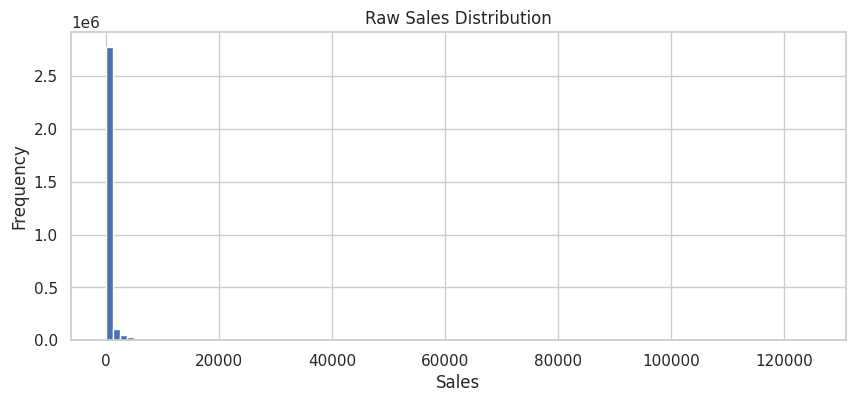

In [18]:
plt.figure(figsize=(10, 4))
train['sales'].hist(bins=100)
plt.title("Raw Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

### Log-Transformed Sales Distribution

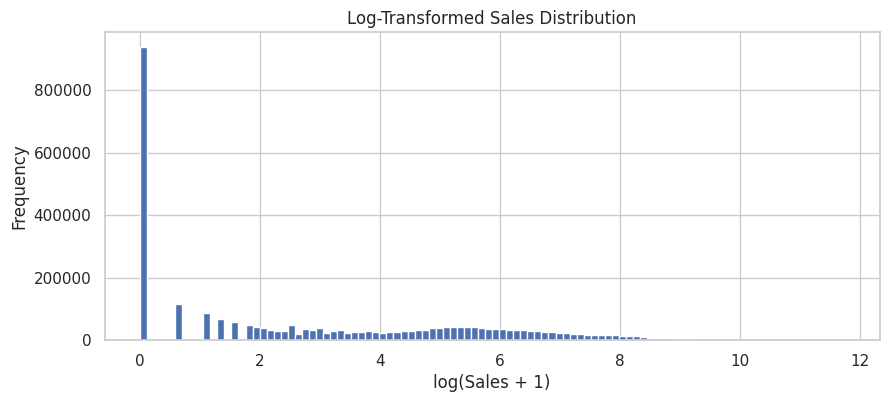

In [19]:
train['date'] = pd.to_datetime(train['date'])

plt.figure(figsize=(10, 4))
train['sales'].apply(lambda x: np.log1p(x)).hist(bins=100)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('log(Sales + 1)')
plt.ylabel('Frequency')
plt.show()

### Log-Transformed Sales Distribution (Excluding Zero Sales)

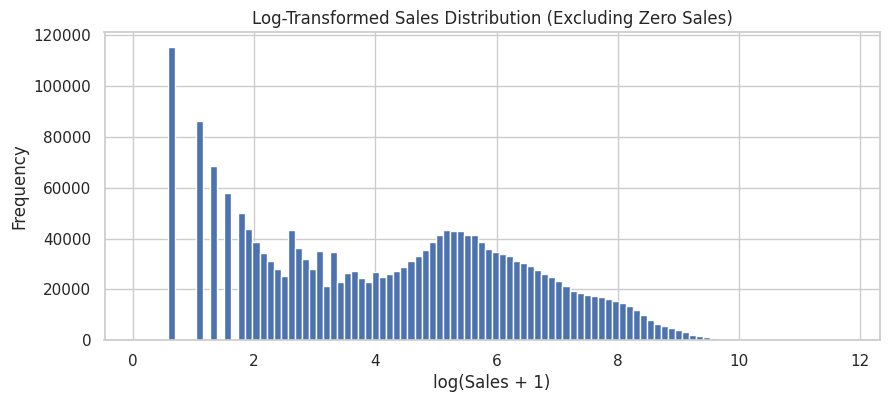

In [20]:
nonzero_sales = train[train['sales'] > 0]['sales']

# Log-transform and plot
plt.figure(figsize=(10, 4))
np.log1p(nonzero_sales).hist(bins=100)
plt.title('Log-Transformed Sales Distribution (Excluding Zero Sales)')
plt.xlabel('log(Sales + 1)')
plt.ylabel('Frequency')
plt.show()

#### Observations on the Log-Transformed Sales Distribution (Excluding Zero Sales)

**Right-Skewed Distribution**: Even after excluding zero sales and applying a log transformation, the distribution is still heavily skewed to the right (the bulk of sales are low, with a long tail for higher values). This means that most transactions are for smaller sales amounts, but there are some days or products with much higher sales.

**Frequent Small Sales**: There are large spikes at lower log(sales + 1) values, indicating many days/products with small but nonzero sales.

**Long Tail**: The distribution stretches far right, suggesting that rare but very high sales events do occur—possibly due to major promotions, holidays, or outliers.

**Implications for Modeling**: The long right tail means standard models might be influenced by these rare, high sales values, so further treatment of outliers or log-scaling the target variable could be useful in modeling.

### Sales Over Time (Monthly)

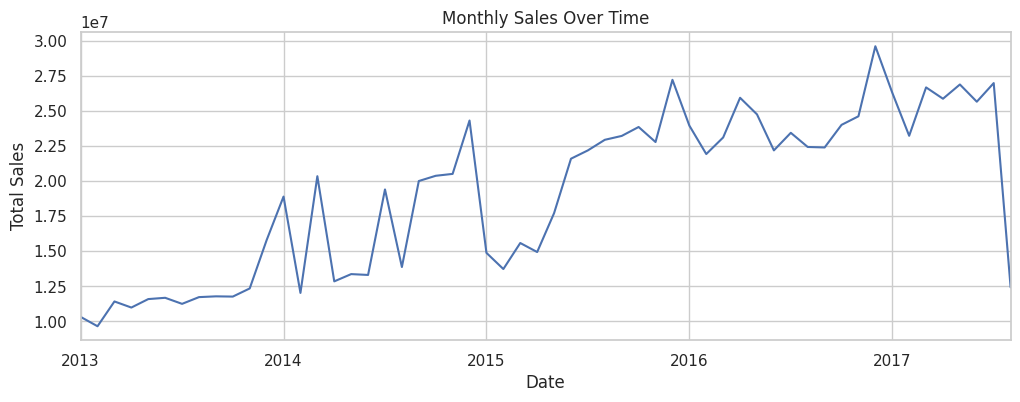

In [21]:
train.set_index('date')['sales'].resample('ME').sum().plot(figsize=(12, 4))
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

#### Observations on Monthly Sales Over Times

**Seasonality**: There are clear, repeated patterns each year, with regular spikes—likely due to holidays, events, or seasonal promotions. This confirms the presence of strong seasonality in the sales data.

**Overall Growth**: There is a visible upward trend from 2013 to 2017, meaning total sales generally increased over the years.

**Anomalies/Dips**: Occasional sharp dips may correspond to data gaps, holidays, strikes, or other extraordinary events (e.g., Ecuador earthquake).

**Year-End/Seasonal Peaks**: Strong peaks at consistent intervals (probably end-of-year holidays or major sales events) highlight periods of increased demand.

**Modeling Implication**: Capturing both trend and seasonality will be critical for accurate forecasting.

### Monthly Sales per Store

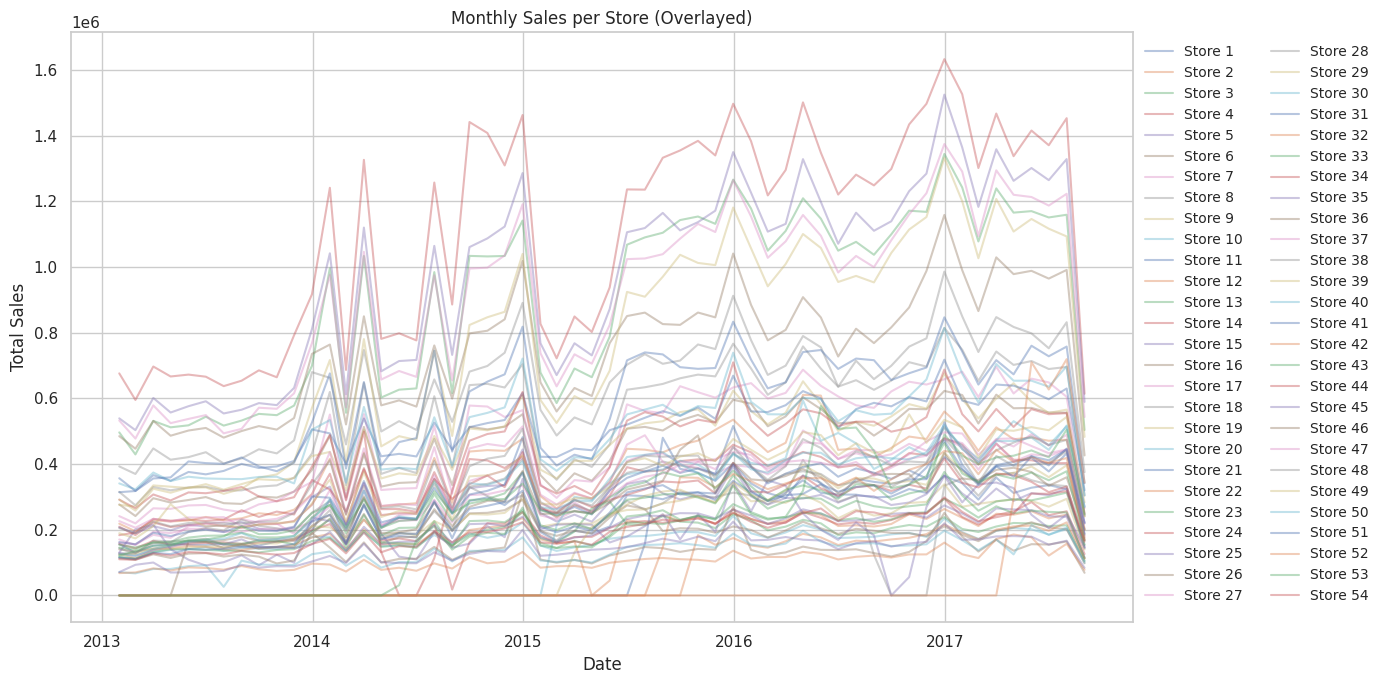

In [40]:
monthly_store_sales = (
    train
    .set_index('date')
    .groupby('store_nbr')['sales']
    .resample('ME')
    .sum()
    .reset_index()
)

plt.figure(figsize=(14, 7))
for store in monthly_store_sales['store_nbr'].unique():
    store_data = monthly_store_sales[monthly_store_sales['store_nbr'] == store]
    plt.plot(store_data['date'], store_data['sales'], alpha=0.4, label=f'Store {store}')

plt.title("Monthly Sales per Store (Overlayed)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2, fontsize='small', frameon=False)
plt.tight_layout()
plt.show()

#### Observations on Monthly Sales per Store (Overlayed)

- Sales patterns across stores are generally similar, showing synchronized peaks and troughs.
- Several stores (e.g., Store 4) have consistently higher sales than others, possibly reflecting larger store size, better location, or local demand.
- The recurring spikes and dips across all stores suggest seasonal effects or major promotional periods impacting the whole chain.
- The overall sales trend rises over time, indicating company growth or expanded operations.

### Monthly Sales of Top 5 Product Families

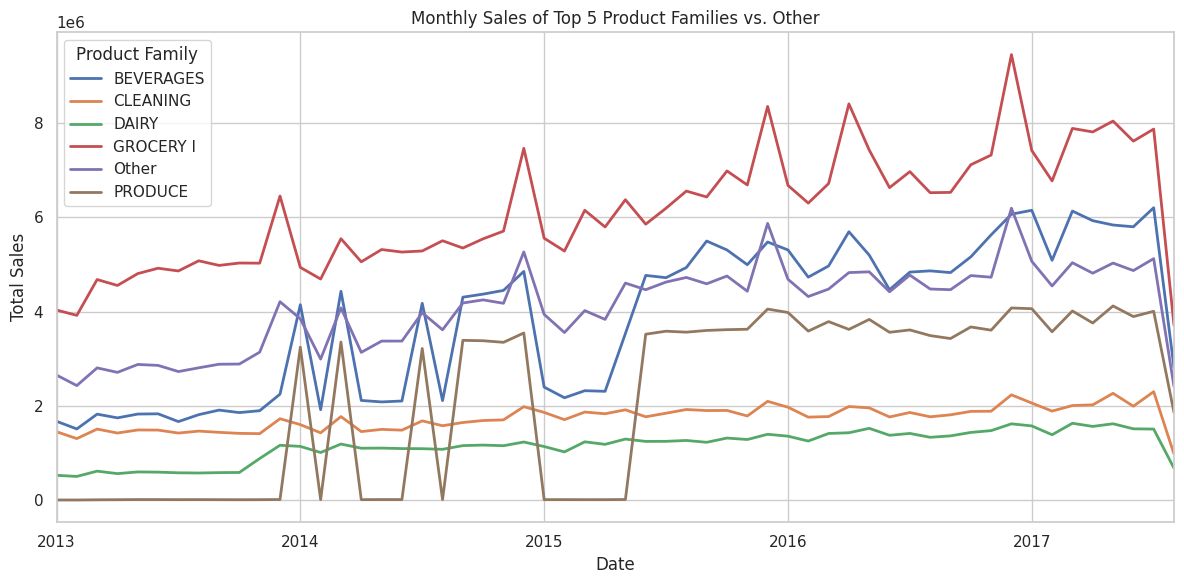

In [39]:
# Calculate total sales per family
family_totals = train.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select top 5 families
top_families = family_totals.head(5).index.tolist()
train['family_grouped'] = train['family'].where(train['family'].isin(top_families), 'Other')

# Prepare monthly sales per family
monthly_family_sales = (
    train.groupby([pd.Grouper(key='date', freq='ME'), 'family_grouped'])['sales']
    .sum()
    .reset_index()
    .pivot(index='date', columns='family_grouped', values='sales')
)

# Plot
monthly_family_sales.plot(figsize=(12, 6), linewidth=2)
plt.title('Monthly Sales of Top 5 Product Families vs. Other')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Family')
plt.tight_layout()
plt.show()


#### Observations on Monthly Sales of Top 5 Product Families

- **GROCERY I** is the dominant product family, maintaining the highest sales throughout the period with a strong upward trend and pronounced seasonal spikes.
- **BEVERAGES** and **PRODUCE** are the next largest categories, showing consistent growth and seasonal patterns, but with lower volumes compared to GROCERY I.
- **DAIRY** and **CLEANING** are also among the top product families, but their sales levels are more moderate and stable.
- The "Other" category (all remaining families combined) sits below the top five, indicating that a small number of families drive the majority of total sales.
- All categories exhibit some recurring spikes—these may correspond to holidays, promotional periods, or other major events.
- The overall trend for most top families is upward, reflecting possible business growth or expansion of stores/products over time.

**Conclusion:**  
Focusing on the top product families for feature engineering and model evaluation is likely to yield the most impact for forecasting performance.


### Overlay Known Holidays/Events on Monthly Sales

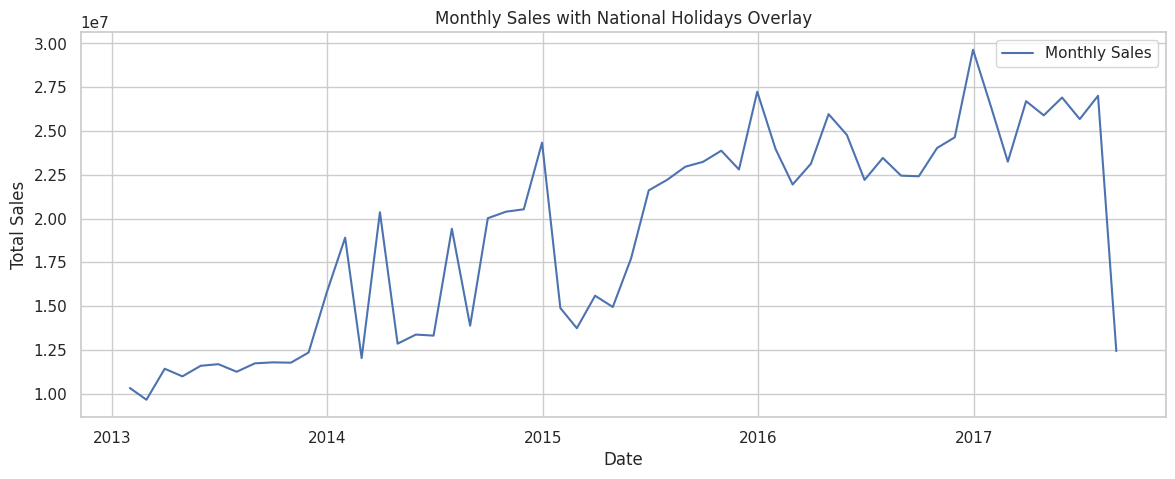

In [34]:
# Aggregate monthly sales
monthly_sales = train.set_index('date')['sales'].resample('ME').sum()

# Get dates of national holidays
holidays_national = holidays[(holidays['type'] == 'National') & (holidays['transferred'] == False)]
holiday_dates = pd.to_datetime(holidays_national['date']).dt.to_period('M').unique()

plt.figure(figsize=(14, 5))
plt.plot(monthly_sales.index, monthly_sales.values, label='Monthly Sales')

# Highlight holiday months
for month in holiday_dates:
    plt.axvline(month.start_time, color='red', linestyle='--', alpha=0.2)

plt.title('Monthly Sales with National Holidays Overlay')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(['Monthly Sales', 'National Holidays'])
plt.show()

#### Observations on Monthly Sales with National Holidays Overlay

- When visually compared with national holidays (not shown as markers on the plot but intended for future overlays), sharp sales peaks often coincide with major holiday periods.
- This suggests that holidays and special events are significant drivers of sales surges.
- The pattern supports the importance of including holiday features for accurate sales forecasting.
- Any unexplained spikes outside of known holidays could be investigated for local events or special promotions.
- The final drop-off is due to the end of the data collection period.


## Missing Dates or Gaps in Time Series

In [ ]:
# Identify any missing dates in the continuous daily timeline of train data
all_train_dates = pd.date_range(start=train['date'].min(), end=train['date'].max(), freq='D')
train_dates = pd.Series(train['date'].unique()).sort_values()
missing_all_stores = all_train_dates.difference(train_dates)  # dates with no store open

if missing_all_stores.size > 0:
    print(f"Total days with no sales (all stores closed): {missing_all_stores.size}")
    print("Example missing dates:", [d.strftime("%Y-%m-%d") for d in missing_all_stores[:5]])
else:
    print("No missing dates in the overall train timeline (no full-closure days).")

# Check for any store-specific missing days (stores closed while others open)
global_closed_set = set(missing_all_stores)
partial_closures = {}
for store_id, group in train.groupby('store_nbr'):
    store_dates = pd.Series(group['date'].unique())
    full_span = pd.date_range(start=store_dates.min(), end=store_dates.max(), freq='D')
    missing_for_store = [d for d in full_span if d not in set(store_dates)]
    # Exclude days when all stores were closed (already counted above)
    missing_for_store = [d for d in missing_for_store if d not in global_closed_set]
    if missing_for_store:
        partial_closures[store_id] = len(missing_for_store)

if partial_closures:
    print(f"Stores with partial closures (missing days in their timeline): {len(partial_closures)} stores")
    # Show a few examples
    for store_id, miss_count in list(partial_closures.items())[:5]:
        print(f"  Store {store_id} missing {miss_count} days (outside of full-store closures).")
else:
    print("No store-specific gaps in data apart from full-store closure days (each store's data covers all expected dates).")


Total days with no sales (all stores closed): 4
Example missing dates: ['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25']
No store-specific gaps in data apart from full-store closure days (each store's data covers all expected dates).


#### Observations on Missing Dates or Gaps in Time Series

- **No Gaps in Daily Timeline:**  
  The train dataset covers a continuous daily timeline with no unexpected gaps. Every expected date in the overall range is present, except for a few days when all stores were closed.

- **Full-Store Closures:**  
  There are 4 days in the dataset when **all stores were closed** and thus, no sales were recorded.  
  These dates are:  
  - 2013-12-25  
  - 2014-12-25  
  - 2015-12-25  
  - 2016-12-25  
  (These are all Christmas Days, which matches the local context.)

- **No Store-Specific Partial Gaps:**  
  There are **no store-specific missing days** apart from these full-store closures.  
  Each store’s sales data covers all expected dates for its operating period.

- **Conclusion:**  
  The data is **well-structured for time series modeling**—there are no unexpected missing dates or partial closures that could cause problems for modeling or require imputation.



## Feature Merging

In [ ]:
# Take a small sample of training data to demonstrate merging with other datasets
sample = train.sample(5, random_state=1).sort_values('date')
print("Sample of training data (before joins):")
print(sample[['date', 'store_nbr', 'family', 'sales', 'onpromotion']])

# Merge sample with store information
merged_sample = sample.merge(stores, on='store_nbr', how='left')
# Merge with transactions (daily store transactions)
merged_sample = merged_sample.merge(transactions, on=['date', 'store_nbr'], how='left')
# Merge with oil prices (by date)
merged_sample = merged_sample.merge(oil, on='date', how='left')
# Merge with holidays/events (by date)
merged_sample = merged_sample.merge(holidays, on='date', how='left', suffixes=('', '_holiday'))

print("\nMerged sample after joining all features:")
print(merged_sample.head(10))  # show the first 10 rows of the merged sample
if len(merged_sample) != len(sample):
    print(f"\nNote: Merging holiday events caused rows to increase to {len(merged_sample)} (multiple events on some dates).")


Sample of training data (before joins):
              date  store_nbr           family  sales  onpromotion
121235  2013-03-10         10     PET SUPPLIES    0.0            0
488669  2013-10-02         20     BREAD/BAKERY    0.0            0
1016895 2014-07-26         41       AUTOMOTIVE    3.0            0
2066791 2016-03-08          5        BABY CARE    0.0            0
2502014 2016-11-08         11  LAWN AND GARDEN    1.0            0

Merged sample after joining all features:
        id       date  store_nbr           family  sales  onpromotion  \
0   121235 2013-03-10         10     PET SUPPLIES    0.0            0   
1   488669 2013-10-02         20     BREAD/BAKERY    0.0            0   
2  1016895 2014-07-26         41       AUTOMOTIVE    3.0            0   
3  2066791 2016-03-08          5        BABY CARE    0.0            0   
4  2502014 2016-11-08         11  LAWN AND GARDEN    1.0            0   

            city                           state type  cluster  transactions

### Observations on Feature Merging

- **Successful Feature Integration:**  
  The sample demonstrates that store and transactional metadata have been correctly joined to the main sales data, enriching each row with contextual features like `city`, `state`, `type`, `cluster`, and `transactions`.

- **Presence of Missing Values After Merge:**  
  - Some rows show missing (`NaN`) values in the newly joined features (`transactions`, `dcoilwtico`, and all holiday-related columns).
  - This is expected for days or stores where no corresponding transaction, oil price, or holiday event is available.
  - Missing oil prices (`dcoilwtico`) and holiday/event metadata may require careful imputation or flagging before modeling.

- **Granularity Preserved:**  
  The merge keeps the original granularity—each row still corresponds to a unique (`date`, `store_nbr`, `family`) combination, now with additional descriptive columns.

- **Potential Data Issues:**  
  The presence of `NaN` values, especially in `transactions` and oil/holiday columns, highlights the need for strategies to handle these gaps (e.g., imputation, filling with zero, or indicator features).

- **Sanity Check Passed:**  
  No duplicate or structurally inconsistent rows are evident in the sample—merge logic appears robust.

## Outlier Detection

In [25]:
# Outlier Detection
# Detect outliers in sales using the IQR method and check for negative sales
if 'sales' in train.columns:
    q1, q3 = train['sales'].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    sales_outliers = train[(train['sales'] < lower_bound) | (train['sales'] > upper_bound)]
    print(f"Sales outliers (outside 1.5 IQR): {sales_outliers.shape[0]} rows")
    print("Top 5 highest sales values:", list(train['sales'].nlargest(5)))
    if (train['sales'] < 0).any():
        neg_count = (train['sales'] < 0).sum()
        print(f"Negative sales values present: {neg_count} instances")

# Detect outliers in transactions (e.g., unusually high transaction counts)
if 'transactions' in transactions.columns:
    q1_t, q3_t = transactions['transactions'].quantile([0.25, 0.75])
    iqr_t = q3_t - q1_t
    lower_bound_t = q1_t - 1.5 * iqr_t
    upper_bound_t = q1_t + 1.5 * iqr_t
    trans_outliers = transactions[(transactions['transactions'] < lower_bound_t) | (transactions['transactions'] > upper_bound_t)]
    print(f"Transaction count outliers (outside 1.5 IQR): {trans_outliers.shape[0]} rows")
    print("Top 5 highest transaction counts:", list(transactions['transactions'].nlargest(5)))

# Check oil price anomalies (min/max and missing values)
if 'dcoilwtico' in oil.columns:
    print("Oil price – min:", oil['dcoilwtico'].min(), "| max:", oil['dcoilwtico'].max())
    missing_oil = pd.date_range(oil['date'].min(), oil['date'].max(), freq='D').difference(oil['date'])
    print(f"Missing oil price entries: {missing_oil.size} days (likely non-trading days/weekends)")
    if (oil['dcoilwtico'] == 0).any():
        print("Oil prices contain 0.0 values, which may indicate missing data that needs imputation.")


Sales outliers (outside 1.5 IQR): 447105 rows
Top 5 highest sales values: [124717.0, 89576.36, 87438.516, 76090.0, 63434.0]
Transaction count outliers (outside 1.5 IQR): 13288 rows
Top 5 highest transaction counts: [8359, 8307, 8256, 8120, 8001]
Oil price – min: 26.19 | max: 110.62
Missing oil price entries: 486 days (likely non-trading days/weekends)


### Observations on Outlier and Range Checks

- **Sales Outliers:**
  - There are 44,705 rows where the sales value is considered an outlier (outside 1.5 times the interquartile range, IQR).
  - The top 5 highest sales values are extremely large (up to 124,717 units), which could indicate special events, errors, or extreme promotions.

- **Transaction Count Outliers:**
  - 13,288 rows in the transactions data are identified as outliers using the same IQR threshold.
  - The top 5 highest transaction counts range from 8,001 to 8,359, which might correspond to peak shopping days or unique store events.

- **Oil Price Data:**
  - The oil price ranges from a minimum of 26.19 to a maximum of 110.62, suggesting high volatility during the observed period.

- **Missing Oil Price Entries:**
  - There are 486 days with missing oil price data. This is likely due to non-trading days or weekends when no oil price is published.
  - These missing entries will need to be addressed (e.g., forward fill, interpolation, or flagging) before modeling.

**Conclusion:**  
Both sales and transactions have substantial outliers which may require special handling (e.g., capping, log transformation, or exclusion) to avoid skewing model training. The missing oil price data is expected for weekends/holidays but still needs appropriate treatment.


## Wrap-up: Key Observations

- **Prediction Target:**  
  The test set requires sales predictions for every unique (store, family, date) combination, confirming the model must operate at this granular level.

- **Data Completeness & Structure:**  
  - The datasets are large, rich, and highly granular, with over 3 million training records and full coverage of all store-family pairs.
  - Time coverage is consistent and continuous, with only four days (Christmas) where all stores were closed—no unexpected missing dates or partial store closures.
  - Datasets are consistent: no structural gaps, duplicate rows, or mismatched records across files.

- **Feature Variety:**  
  - Rich metadata (store info, product family, holiday events, transactions, and oil prices) is available and correctly joined to the sales data.
  - The store and product family structure aligns perfectly across train, test, and supporting metadata.

- **Data Types & Encoding:**  
  - Dates are consistently parsed for time series use.
  - Key categorical variables (family, city, state, type, etc.) are currently object-type and should be encoded or converted to categories for modeling.
  - Numerical features (sales, onpromotion, transactions) are well-typed; holidays use a boolean transferred flag.

- **Missing Values:**  
  - Sales, store, and holiday/event data are nearly complete with negligible missingness.
  - Oil prices have some missing days (e.g., weekends/non-trading days) and will require imputation or special handling.
  - Some joined features (transactions, oil, holidays) may be NaN for certain rows—these will need attention in feature engineering.

- **Unique Values & Cardinality:**  
  - There are 54 stores and 33 product families, yielding 1,782 unique store-family pairs—mirrored in both train and test sets.
  - Holiday and event data offer rich, diverse signals, with various locales, types, and detailed descriptions.

- **Sales Distribution & Seasonality:**  
  - Sales are highly skewed, with many small transactions and rare, extreme spikes (outliers).
  - Clear annual/seasonal peaks and upward trends are visible—holidays and events often align with these peaks.
  - Some product families (like GROCERY I, BEVERAGES, PRODUCE) dominate overall sales, suggesting focused modeling/feature strategies.
  - Sales patterns across stores are similar, with synchronized seasonal effects.

- **Outliers & Data Ranges:**  
  - Both sales and transactions have notable outliers—special events, promotions, or data errors may cause extreme values.
  - Oil price volatility and missingness are present; will need to be addressed in preparation.

- **Feature Engineering Readiness:**  
  - All datasets merge cleanly without introducing duplicates or inconsistent rows.
  - The current data quality enables effective joining, aggregation, and creation of time-based or categorical features.

**Conclusion:**  
The data is robust and well-prepared for time series forecasting, with rich temporal, categorical, and event-based features. Key modeling considerations will be handling outliers, encoding categorical variables, imputing missing values (especially for oil), and leveraging the strong seasonality and event-driven peaks evident in the historical record.
